In [59]:
import warnings
from datetime import datetime
from pathlib import Path

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.cuda.amp import GradScaler, autocast
from torch.utils.data import random_split, DataLoader

import ignite
import ignite.distributed as idist
from ignite.contrib.engines import common
from ignite.engine import Engine, Events
from ignite.handlers import Checkpoint, global_step_from_engine
from ignite.metrics import Bleu
from ignite.utils import manual_seed, setup_logger

from datasets import load_dataset
from transformers import ViTConfig, ViTForMaskedImageModeling, ViTModel, ViTFeatureExtractor

from ignite.engine import Events, create_supervised_trainer, create_supervised_evaluator
from dotmap import DotMap as dm

import matplotlib.pyplot as plt
import math

import hands_dataloader
import hands_model

%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
%matplotlib inline
%autoreload 2

torch.Size([1, 1, 8])
torch.Size([1, 21, 1])
torch.Size([1, 21, 16])


/tmp/ipykernel_83598/1829898902.py:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(-math.pi, math.pi, math.tau/20).unsqueeze(0).to(torch.float32)


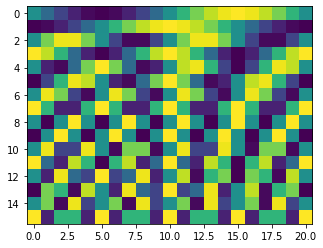

tensor([[-3.1416, -2.8274, -2.5133, -2.1991, -1.8850, -1.5708, -1.2566, -0.9425,
         -0.6283, -0.3142,  0.0000,  0.3142,  0.6283,  0.9425,  1.2566,  1.5708,
          1.8850,  2.1991,  2.5133,  2.8274,  3.1416]])

In [66]:
x = torch.range(-math.pi, math.pi, math.tau/20).unsqueeze(0).to(torch.float32)

pos_embd = hands_model.CustomPositionalEncoding(16, math.tau)

pos = pos_embd(x)

fig, ax = plt.subplots()
ax.imshow(np.array(torch.t(pos[0])))
plt.show()

x